## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()
optimizer = keras.optimizers.SGD(lr=0.001)
# optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 12s 245us/step - loss: 2.2601 - accuracy: 0.1584 - val_loss: 2.1907 - val_accuracy: 0.2142
Epoch 2/500
50000/50000 [==============================] - 12s 242us/step - loss: 2.1514 - accuracy: 0.2329 - val_loss: 2.1165 - val_accuracy: 0.2508
Epoch 3/500
50000/50000 [==============================] - 11s 225us/step - loss: 2.0908 - accuracy: 0.2586 - val_loss: 2.0658 - val_accuracy: 0.2692
Epoch 4/500
50000/50000 [==============================] - 11s 214us/step - loss: 2.0465 - accuracy: 0.2765 - val_loss: 2.0271 - val_accuracy: 0.2876
Epoch 5/500
50000/50000 [==============================] - 11s 218us/step - loss: 2.0118 - accuracy: 0.2898 - val_loss: 1.9961 - val_accuracy: 0.2984
Epoch 6/500
50000/50000 [==============================] - 11s 228us/step - loss: 1.9833 - accuracy: 0.3014 - val_loss: 1.9701 - val_accuracy: 0.3105
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.6436 - accuracy: 0.4255 - val_loss: 1.6485 - val_accuracy: 0.4209
Epoch 56/500
50000/50000 [==============================] - 12s 233us/step - loss: 1.6403 - accuracy: 0.4276 - val_loss: 1.6467 - val_accuracy: 0.4223
Epoch 57/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.6375 - accuracy: 0.4290 - val_loss: 1.6431 - val_accuracy: 0.4234
Epoch 58/500
50000/50000 [==============================] - 12s 230us/step - loss: 1.6342 - accuracy: 0.4292 - val_loss: 1.6398 - val_accuracy: 0.4250
Epoch 59/500
50000/50000 [==============================] - 12s 237us/step - loss: 1.6315 - accuracy: 0.4293 - val_loss: 1.6394 - val_accuracy: 0.4246
Epoch 60/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.6284 - accuracy: 0.4310 - val_loss: 1.6344 - val_accuracy: 0.4290
Epoch 61/500
50000/50000 [==============================] - 12s 240us/step - loss: 1.6254 - ac

50000/50000 [==============================] - 12s 236us/step - loss: 1.5126 - accuracy: 0.4719 - val_loss: 1.5425 - val_accuracy: 0.4587
Epoch 110/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.5105 - accuracy: 0.4724 - val_loss: 1.5358 - val_accuracy: 0.4602
Epoch 111/500
50000/50000 [==============================] - 12s 237us/step - loss: 1.5089 - accuracy: 0.4738 - val_loss: 1.5348 - val_accuracy: 0.4593
Epoch 112/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.5066 - accuracy: 0.4733 - val_loss: 1.5349 - val_accuracy: 0.4603
Epoch 113/500
50000/50000 [==============================] - 12s 241us/step - loss: 1.5048 - accuracy: 0.4742 - val_loss: 1.5327 - val_accuracy: 0.4608
Epoch 114/500
50000/50000 [==============================] - 12s 240us/step - loss: 1.5029 - accuracy: 0.4743 - val_loss: 1.5327 - val_accuracy: 0.4592
Epoch 115/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.5010 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 12s 237us/step - loss: 1.4193 - accuracy: 0.5054 - val_loss: 1.4749 - val_accuracy: 0.4797
Epoch 164/500
50000/50000 [==============================] - 12s 239us/step - loss: 1.4175 - accuracy: 0.5059 - val_loss: 1.4705 - val_accuracy: 0.4804
Epoch 165/500
50000/50000 [==============================] - 12s 239us/step - loss: 1.4160 - accuracy: 0.5063 - val_loss: 1.4735 - val_accuracy: 0.4774
Epoch 166/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.4143 - accuracy: 0.5071 - val_loss: 1.4645 - val_accuracy: 0.4809
Epoch 167/500
50000/50000 [==============================] - 12s 239us/step - loss: 1.4131 - accuracy: 0.5067 - val_loss: 1.4676 - val_accuracy: 0.4799
Epoch 168/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.4115 - accuracy: 0.5067 - val_loss: 1.4756 - val_accuracy: 0.4809
Epoch 169/500
50000/50000 [==============================] - 12s 241us/step - loss: 1.41

Epoch 217/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.3418 - accuracy: 0.5324 - val_loss: 1.4240 - val_accuracy: 0.4942
Epoch 218/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.3403 - accuracy: 0.5327 - val_loss: 1.4204 - val_accuracy: 0.4978
Epoch 219/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.3391 - accuracy: 0.5326 - val_loss: 1.4177 - val_accuracy: 0.4964
Epoch 220/500
50000/50000 [==============================] - 14s 270us/step - loss: 1.3371 - accuracy: 0.5333 - val_loss: 1.4208 - val_accuracy: 0.4974
Epoch 221/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.3363 - accuracy: 0.5332 - val_loss: 1.4173 - val_accuracy: 0.4960
Epoch 222/500
50000/50000 [==============================] - 11s 225us/step - loss: 1.3346 - accuracy: 0.5353 - val_loss: 1.4203 - val_accuracy: 0.4989
Epoch 223/500
50000/50000 [==============================] - 15s 300us/step - loss: 1.33

50000/50000 [==============================] - 12s 237us/step - loss: 1.2757 - accuracy: 0.5544 - val_loss: 1.3867 - val_accuracy: 0.5079
Epoch 271/500
50000/50000 [==============================] - 12s 245us/step - loss: 1.2742 - accuracy: 0.5557 - val_loss: 1.3876 - val_accuracy: 0.5087
Epoch 272/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.2734 - accuracy: 0.5553 - val_loss: 1.3816 - val_accuracy: 0.5081
Epoch 273/500
50000/50000 [==============================] - 12s 240us/step - loss: 1.2714 - accuracy: 0.5554 - val_loss: 1.4035 - val_accuracy: 0.5007
Epoch 274/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.2707 - accuracy: 0.5560 - val_loss: 1.3993 - val_accuracy: 0.5026
Epoch 275/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.2694 - accuracy: 0.5559 - val_loss: 1.3825 - val_accuracy: 0.5114
Epoch 276/500
50000/50000 [==============================] - 12s 245us/step - loss: 1.2682 - accuracy:

Epoch 324/500
50000/50000 [==============================] - 11s 227us/step - loss: 1.2142 - accuracy: 0.5767 - val_loss: 1.3650 - val_accuracy: 0.5170
Epoch 325/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.2135 - accuracy: 0.5771 - val_loss: 1.3844 - val_accuracy: 0.5081
Epoch 326/500
50000/50000 [==============================] - 12s 241us/step - loss: 1.2119 - accuracy: 0.5778 - val_loss: 1.3702 - val_accuracy: 0.5156
Epoch 327/500
50000/50000 [==============================] - 12s 240us/step - loss: 1.2099 - accuracy: 0.5781 - val_loss: 1.3602 - val_accuracy: 0.5150
Epoch 328/500
50000/50000 [==============================] - 12s 233us/step - loss: 1.2095 - accuracy: 0.5776 - val_loss: 1.3591 - val_accuracy: 0.5175
Epoch 329/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.2084 - accuracy: 0.5798 - val_loss: 1.3644 - val_accuracy: 0.5152
Epoch 330/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.20

Epoch 378/500
50000/50000 [==============================] - 11s 213us/step - loss: 1.1554 - accuracy: 0.5976 - val_loss: 1.3481 - val_accuracy: 0.5166
Epoch 379/500
50000/50000 [==============================] - 11s 213us/step - loss: 1.1549 - accuracy: 0.5974 - val_loss: 1.3681 - val_accuracy: 0.5169
Epoch 380/500
50000/50000 [==============================] - 10s 210us/step - loss: 1.1544 - accuracy: 0.5967 - val_loss: 1.3798 - val_accuracy: 0.5071
Epoch 381/500
50000/50000 [==============================] - 11s 217us/step - loss: 1.1520 - accuracy: 0.5984 - val_loss: 1.3597 - val_accuracy: 0.5177
Epoch 382/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.1513 - accuracy: 0.5993 - val_loss: 1.3479 - val_accuracy: 0.5207
Epoch 383/500
50000/50000 [==============================] - 11s 217us/step - loss: 1.1494 - accuracy: 0.5998 - val_loss: 1.3849 - val_accuracy: 0.5115
Epoch 384/500
50000/50000 [==============================] - 10s 208us/step - loss: 1.14

Epoch 432/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.0992 - accuracy: 0.6172 - val_loss: 1.3491 - val_accuracy: 0.5218
Epoch 433/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.0976 - accuracy: 0.6178 - val_loss: 1.3441 - val_accuracy: 0.5214
Epoch 434/500
50000/50000 [==============================] - 12s 230us/step - loss: 1.0967 - accuracy: 0.6181 - val_loss: 1.3604 - val_accuracy: 0.5190
Epoch 435/500
50000/50000 [==============================] - 12s 233us/step - loss: 1.0968 - accuracy: 0.6188 - val_loss: 1.4042 - val_accuracy: 0.5043
Epoch 436/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.0979 - accuracy: 0.6180 - val_loss: 1.3494 - val_accuracy: 0.5207
Epoch 437/500
50000/50000 [==============================] - 11s 227us/step - loss: 1.0945 - accuracy: 0.6196 - val_loss: 1.3574 - val_accuracy: 0.5215
Epoch 438/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.09

Epoch 486/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.0467 - accuracy: 0.6358 - val_loss: 1.3865 - val_accuracy: 0.5163
Epoch 487/500
50000/50000 [==============================] - 11s 227us/step - loss: 1.0468 - accuracy: 0.6365 - val_loss: 1.3675 - val_accuracy: 0.5185
Epoch 488/500
50000/50000 [==============================] - 12s 233us/step - loss: 1.0408 - accuracy: 0.6385 - val_loss: 1.3485 - val_accuracy: 0.5227
Epoch 489/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.0429 - accuracy: 0.6372 - val_loss: 1.3452 - val_accuracy: 0.5221
Epoch 490/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.0402 - accuracy: 0.6374 - val_loss: 1.3494 - val_accuracy: 0.5238
Epoch 491/500
50000/50000 [==============================] - 11s 228us/step - loss: 1.0385 - accuracy: 0.6399 - val_loss: 1.3519 - val_accuracy: 0.5218
Epoch 492/500
50000/50000 [==============================] - 12s 230us/step - loss: 1.03

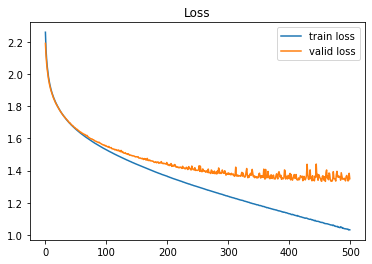

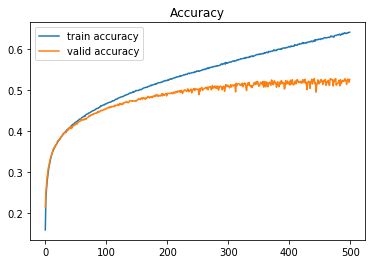

In [14]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

import numpy as np

history = model.history.history
# use allow_pickle=True in np.load

np.save("d077_500epoch_SGD_history.npy",history)
# item = np.load("d077_500epoch_SGD_history.npy",allow_pickle=True).item()


## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢